In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
from matplotlib import pyplot as plt
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
#!pip install seaborn
#!pip install scikit-learn
import seaborn as sns
sns.set()
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
#!pip install joblib
import joblib
from scipy.spatial import distance as dist
from imutils import face_utils

In [ ]:
CSV_FILE = 'datasets/landmarks_ratios.csv'
MODEL_PATH = 'models/landmarks'

In [ ]:
data = pd.read_csv(CSV_FILE)
data.head(5)

In [ ]:
data = data.drop(columns=['Image'])
data.head(5)

In [ ]:
data.describe()

In [ ]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (10,10), diagonal = 'hist');

In [ ]:
def plot_roc_curve(test_y, y_score):
    fpr, tpr, _ = roc_curve(test_y, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.show()

def plot_confussion_matrix(test_y, y_pred):
    cnf_matrix = confusion_matrix(test_y, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
# features
X = data[['Left_Eye_AR', 'Right_Eye_AR', 'Mouth_AR']]
print(X.shape)

# Target
y = data['Awake']
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize point coordinates
# min_max_scaler = MinMaxScaler()
# X_train = min_max_scaler.fit_transform(X_train)
# X_test = min_max_scaler.fit_transform(X_test)
# print(X_train[:5])

In [ ]:
def evaluate_model(model):
    # Make predictions
    svm_predictions = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, svm_predictions))

    # Evaluate the model
    print(classification_report(y_test, svm_predictions))

    #confussion matrix
    y_pred = model.predict(X_test)
    plot_confussion_matrix(y_test, y_pred)

# Logistic regresion model

In [ ]:
start = time.time()

log_reg_model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

log_reg_model.fit(X_train, y_train)

end = time.time()
print(f'Time taken to train model: {end - start} seconds')
# print('Best parameters for SVM: ', svm_grid_search.best_params_)

joblib.dump(log_reg_model, MODEL_PATH + '/logr.pkl' )

evaluate_model(log_reg_model)

# Support Vector Machines (SVM)
### This algorithm can model complex, non-linear relationships. It may work better than Logistic Regression if such relationships are present in the data. However, it may take longer to train, especially with large datasets.

In [ ]:
start = time.time()

    # 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
    # 'kernel': ['rbf',  'sigmoid']
svm_params = {
    'C': [200],
    'gamma': ['scale'],
    'kernel': ['rbf']
}
# svm_grid_search = GridSearchCV(SVC(probability=True), svm_params, cv=5)

svm_grid_search = SVC(
    probability=True,
    C=200,
    gamma='scale',
    kernel='rbf'
)
# Fit the model
svm_grid_search.fit(X_train, y_train)

end = time.time()
print(f'Time taken to train model: {end - start} seconds')
# print('Best parameters for SVM: ', svm_grid_search.best_params_)

joblib.dump(svm_grid_search, MODEL_PATH + '/svm.pkl' )

evaluate_model(svm_grid_search)

# Random Forest Classifier
### This is an ensemble method that builds multiple decision trees and combines their predictions. It often performs well out-of-the-box and can handle non-linear relationships.

Time taken to train model: 867.4575142860413 seconds
Accuracy: 0.8271832718327183
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       804
           1       0.82      0.85      0.83       822

    accuracy                           0.83      1626
   macro avg       0.83      0.83      0.83      1626
weighted avg       0.83      0.83      0.83      1626



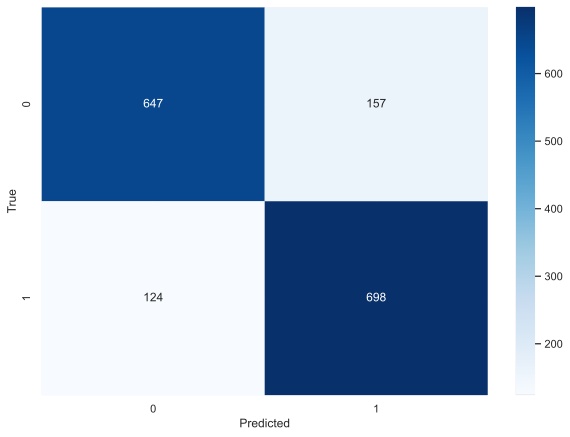

['models/landmarks/rfgrid.pkl']

In [157]:
#hyperparameters
# rf_params = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }
# rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), rf_params, cv=5)
# rf_grid_search.fit(X_train, y_train)
# print('Best parameters for RandomForestClassifier: ', rf_grid_search.best_params_)

#model training
# start = time.time()
# best_params = {
#     'n_estimators': [500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }
model = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10
)
model.fit(X_train, y_train)
end = time.time()
print(f'Time taken to train model: {end - start} seconds')

evaluate_model(model)

#save the model
joblib.dump(model, MODEL_PATH + '/rfgrid.pkl' )

#  Gradient Boosting Classifier
### This is another powerful ensemble method, which builds trees sequentially, each trying to correct the mistakes of the previous one.

In [ ]:
start = time.time()

# gb_params = {
#     'n_estimators': [500],
#     'learning_rate': [0.1],
#     'max_depth': [3],
#     'min_samples_split': [5],
#     'min_samples_leaf': [1],
# }
# gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5)

# gb_grid_search.fit(X_train, y_train)

gb_grid_search = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=1
);

gb_grid_search.fit(X_train, y_train)
end = time.time()

joblib.dump(gb_grid_search, MODEL_PATH + '/gbgrid.pkl' )
#
# print('Best parameters for GradientBoostingClassifier: ', gb_grid_search.best_params_)
print(f'Time taken to train model: {end - start} seconds')

evaluate_model(gb_grid_search)

# Raspberry Pi script

In [ ]:
# to raspberry =>>
import dlib
import glob2
import os
import cv2
import imutils
from matplotlib import pyplot as plt
import joblib

DATASET = 'datasets/dmd/test'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('datasets/dlib/shape_predictor_68_face_landmarks.dat')

def get_landmarks_ratios(frame):

    frame = imutils.resize(frame, width=640)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces
    faces = detector(gray)

    if len(faces) == 0:
        return None

    # get the largest face
    largest_face = None;
    for face in faces:
        largest_face_area = 0;
        if face.area() > largest_face_area:
            largest_face = face

    shape = predictor(gray, largest_face)

    # Extracting the indices of the facial features
    (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
    (mStart, mEnd) = face_utils.FACIAL_LANDMARKS_IDXS["inner_mouth"]

    # Get coordinates for left eye, right eye, and mouth
    left_eye = [(shape.part(i).x, shape.part(i).y) for i in range(lStart, lEnd)]
    right_eye = [(shape.part(i).x, shape.part(i).y) for i in range(rStart, rEnd)]
    mouth = [(shape.part(i).x, shape.part(i).y) for i in range(mStart, mEnd)]

    # Compute aspect ratios for the eyes and mouth
    def eye_aspect_ratio(eye):
        A = dist.euclidean(eye[1], eye[5])
        B = dist.euclidean(eye[2], eye[4])
        C = dist.euclidean(eye[0], eye[3])
        ear = (A + B) / (2.0 * C)
        return ear

    def mouth_aspect_ratio(mouth):
        A = dist.euclidean(mouth[2], mouth[6])
        C = dist.euclidean(mouth[0], mouth[4])
        mar = A / C
        return mar

    left_ear = eye_aspect_ratio(left_eye)
    right_ear = eye_aspect_ratio(right_eye)
    mouth_ar = mouth_aspect_ratio(mouth)

    return left_ear, right_ear, mouth_ar

file_paths = glob2.glob(DATASET + '/**/*.jpg')
rows = []
model = joblib.load(MODEL_PATH + '/pimodel.pkl')
for i, file_path in enumerate(file_paths):

    img = cv2.imread(file_path)
    ratios = get_landmarks_ratios(img)

    print('\n')
    print(f'image: {file_path}')
    if img is not None and ratios is not None:
        features = np.array([ratios])
        features = features.reshape(1, -1)
        predictions = model.predict(features)
        print(predictions)
        print('Awake' if predictions[0] else 'Drowsy')
    else:
        print('No faces detected in the image.')

        # test_row = {
        #     "Left_Eye_AR": ratios[0],
        #     "Right_Eye_AR": ratios[1],
        #     "Mouth_AR": ratios[2]
        # }
        # df = pd.DataFrame(test_row)
        #
        # print(f'file_path')
        # joblib.load(MODEL_PATH + '/svc.pkl')
        # y_pred = clf.predict(df)
        # print(f'Prediction: {y_pred}')